             Liverpool Hope University CSCCORE2H001AZ2022/3  Intelligent Systems 

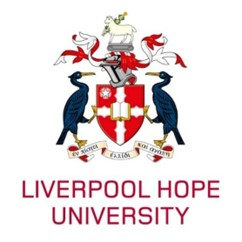

                                   Hammmada Ballali Ebbi 20203543

# Description

- Data represents the market values of different cryptocurrencies from the date of its creation until July 6, 2021. 
- This data is taken from coinmarketcap and it is free to use the data. 
- The objective of this analysis is to try to identify the characteristics of the volatility of the cryptocurrency market and try to assess to what extent the price of a currency can be predicted in a specific range of dates.

Cryptocurrencies included in the analysis:

- BinanceCoin
- Bitcoin
- Ethereum
- USDcoin

Columns in the dataset:

- Date : date of observation
- Open : Opening price on the given day
- High : Highest price on the given day
- Low : Lowest price on the given day
- Close : Closing price on the given day
- Total Volume - Total number of avocados sold
- Volume : Volume of transactions on the given day
- Market Cap : Market capitalization in USD

Tools:

- Python : most used programming language for data analysis
- Jupyter: allows running notebook documents in web browser

Libraries:

- Pandas : for data manipulation using dataframes
- Numpy : for data statistical analysis 
- matplotlib : for data visualisation
- random: implements pseudo-random numbers
- seaborn : python data visualisation library based on matplotlib
- fbprophet - Iallows you to process data from a date range perspective. Released by Facebook’s Core Data Science team.

# IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from prophet import Prophet

In [2]:
# dataframes creation for both training and testing datasets 
Bitcoin_df = pd.read_csv('coin_Bitcoin.csv')
BinanceCoin_df = pd.read_csv('coin_BinanceCoin.csv')
Ethereum_df = pd.read_csv('coin_Ethereum.csv')
USDCoin_df = pd.read_csv('coin_USDCoin.csv')


In [3]:
# We start analysing Bitcoin. 
#Display the head of the training dataset
Bitcoin_df.head(10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


In [4]:
#Display the last elements of the training dataset
Bitcoin_df.tail(10)


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2981,2982,Bitcoin,BTC,2021-06-27 23:59:59,34656.127356,32071.757148,32287.523211,34649.644588,3.551164e+10,6.494617e+11
2982,2983,Bitcoin,BTC,2021-06-28 23:59:59,35219.891791,33902.075892,34679.122222,34434.335314,3.389252e+10,6.454428e+11
2983,2984,Bitcoin,BTC,2021-06-29 23:59:59,36542.111018,34252.484892,34475.559697,35867.777735,3.790146e+10,6.723334e+11
2984,2985,Bitcoin,BTC,2021-06-30 23:59:59,36074.759757,34086.151878,35908.388054,35040.837249,3.405904e+10,6.568525e+11
2985,2986,Bitcoin,BTC,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [5]:
# Apllying sort function to make sure that the data is sorted by date.
Bitcoin_df = Bitcoin_df.sort_values("Date")

# VISUALIZING EVOLUTION OF THE PRICE THROUGH THE TIME FROM DIFFERENT PERSPECTIVES

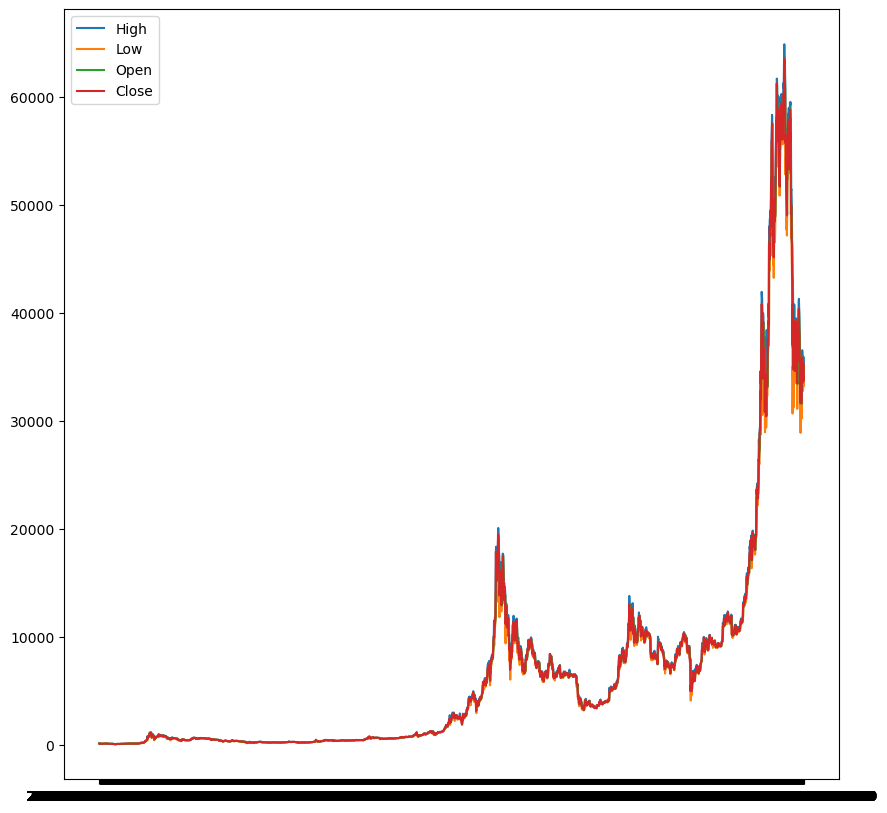

In [6]:
plt.figure(figsize=(10,10))
plt.plot(Bitcoin_df['Date'], Bitcoin_df['High'], label='High')
plt.plot(Bitcoin_df['Date'], Bitcoin_df['Low'], label='Low')
plt.plot(Bitcoin_df['Date'], Bitcoin_df['Open'], label='Open')
plt.plot(Bitcoin_df['Date'], Bitcoin_df['Close'], label='Close')

plt.legend()
plt.show()

In [7]:
#Renaming columns for forecasting prupose
Bitcoin_df = Bitcoin_df.rename(columns={'Date':'ds', 'High':'y'})

In [8]:
#Apllying prophet tools to forecast
m = Prophet()
m.fit(Bitcoin_df)
# Forecasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\majid\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\majid\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\majid\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


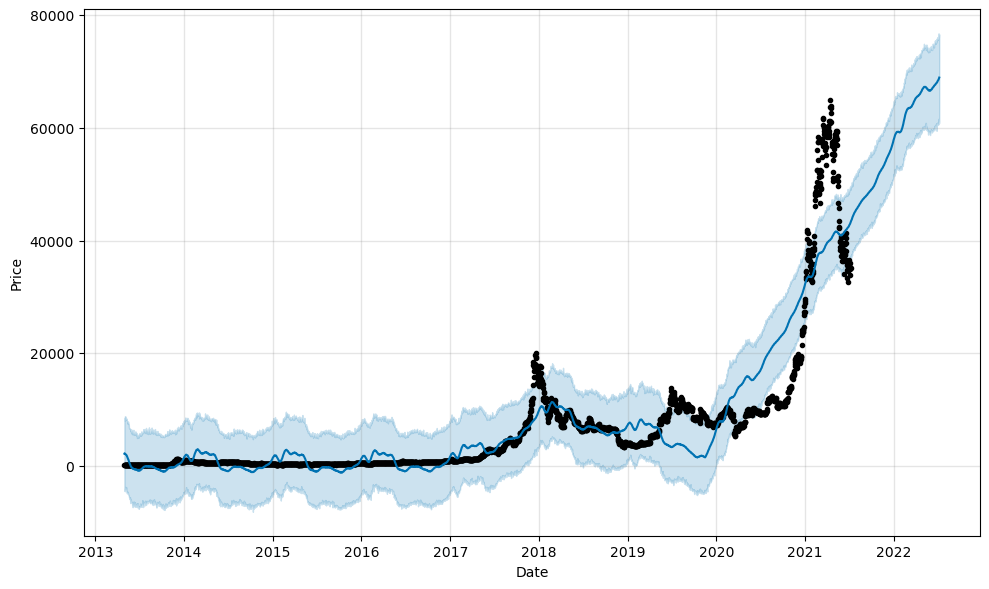

In [9]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

C:\Users\majid\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\majid\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


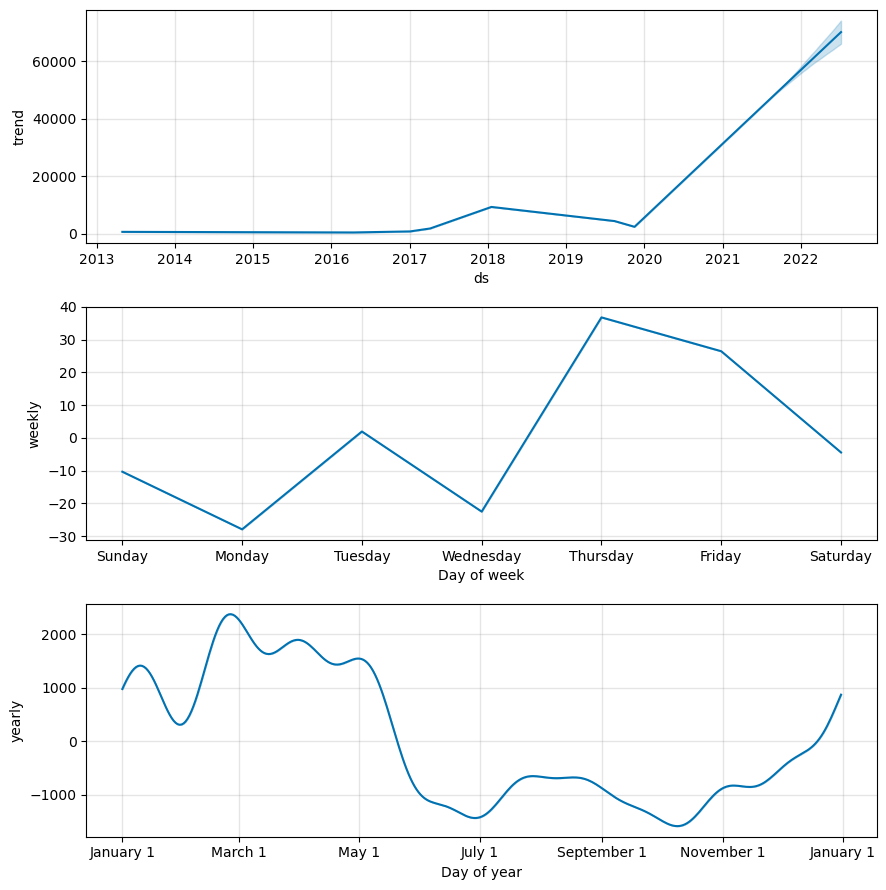

In [10]:
figure3 = m.plot_components(forecast)

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [11]:
Bitcoin_df = Bitcoin_df.rename(columns={'ds':'Date', 'y':'High'})

In [12]:
Bitcoin_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [13]:
#The SNo,volume,name and symbol columns are dropped as they doesnt provide any usefull information
#The Close value is dropped as it be the y value
X = Bitcoin_df.drop(['SNo','Name','Volume','Symbol','Close','Marketcap'], axis = 1)

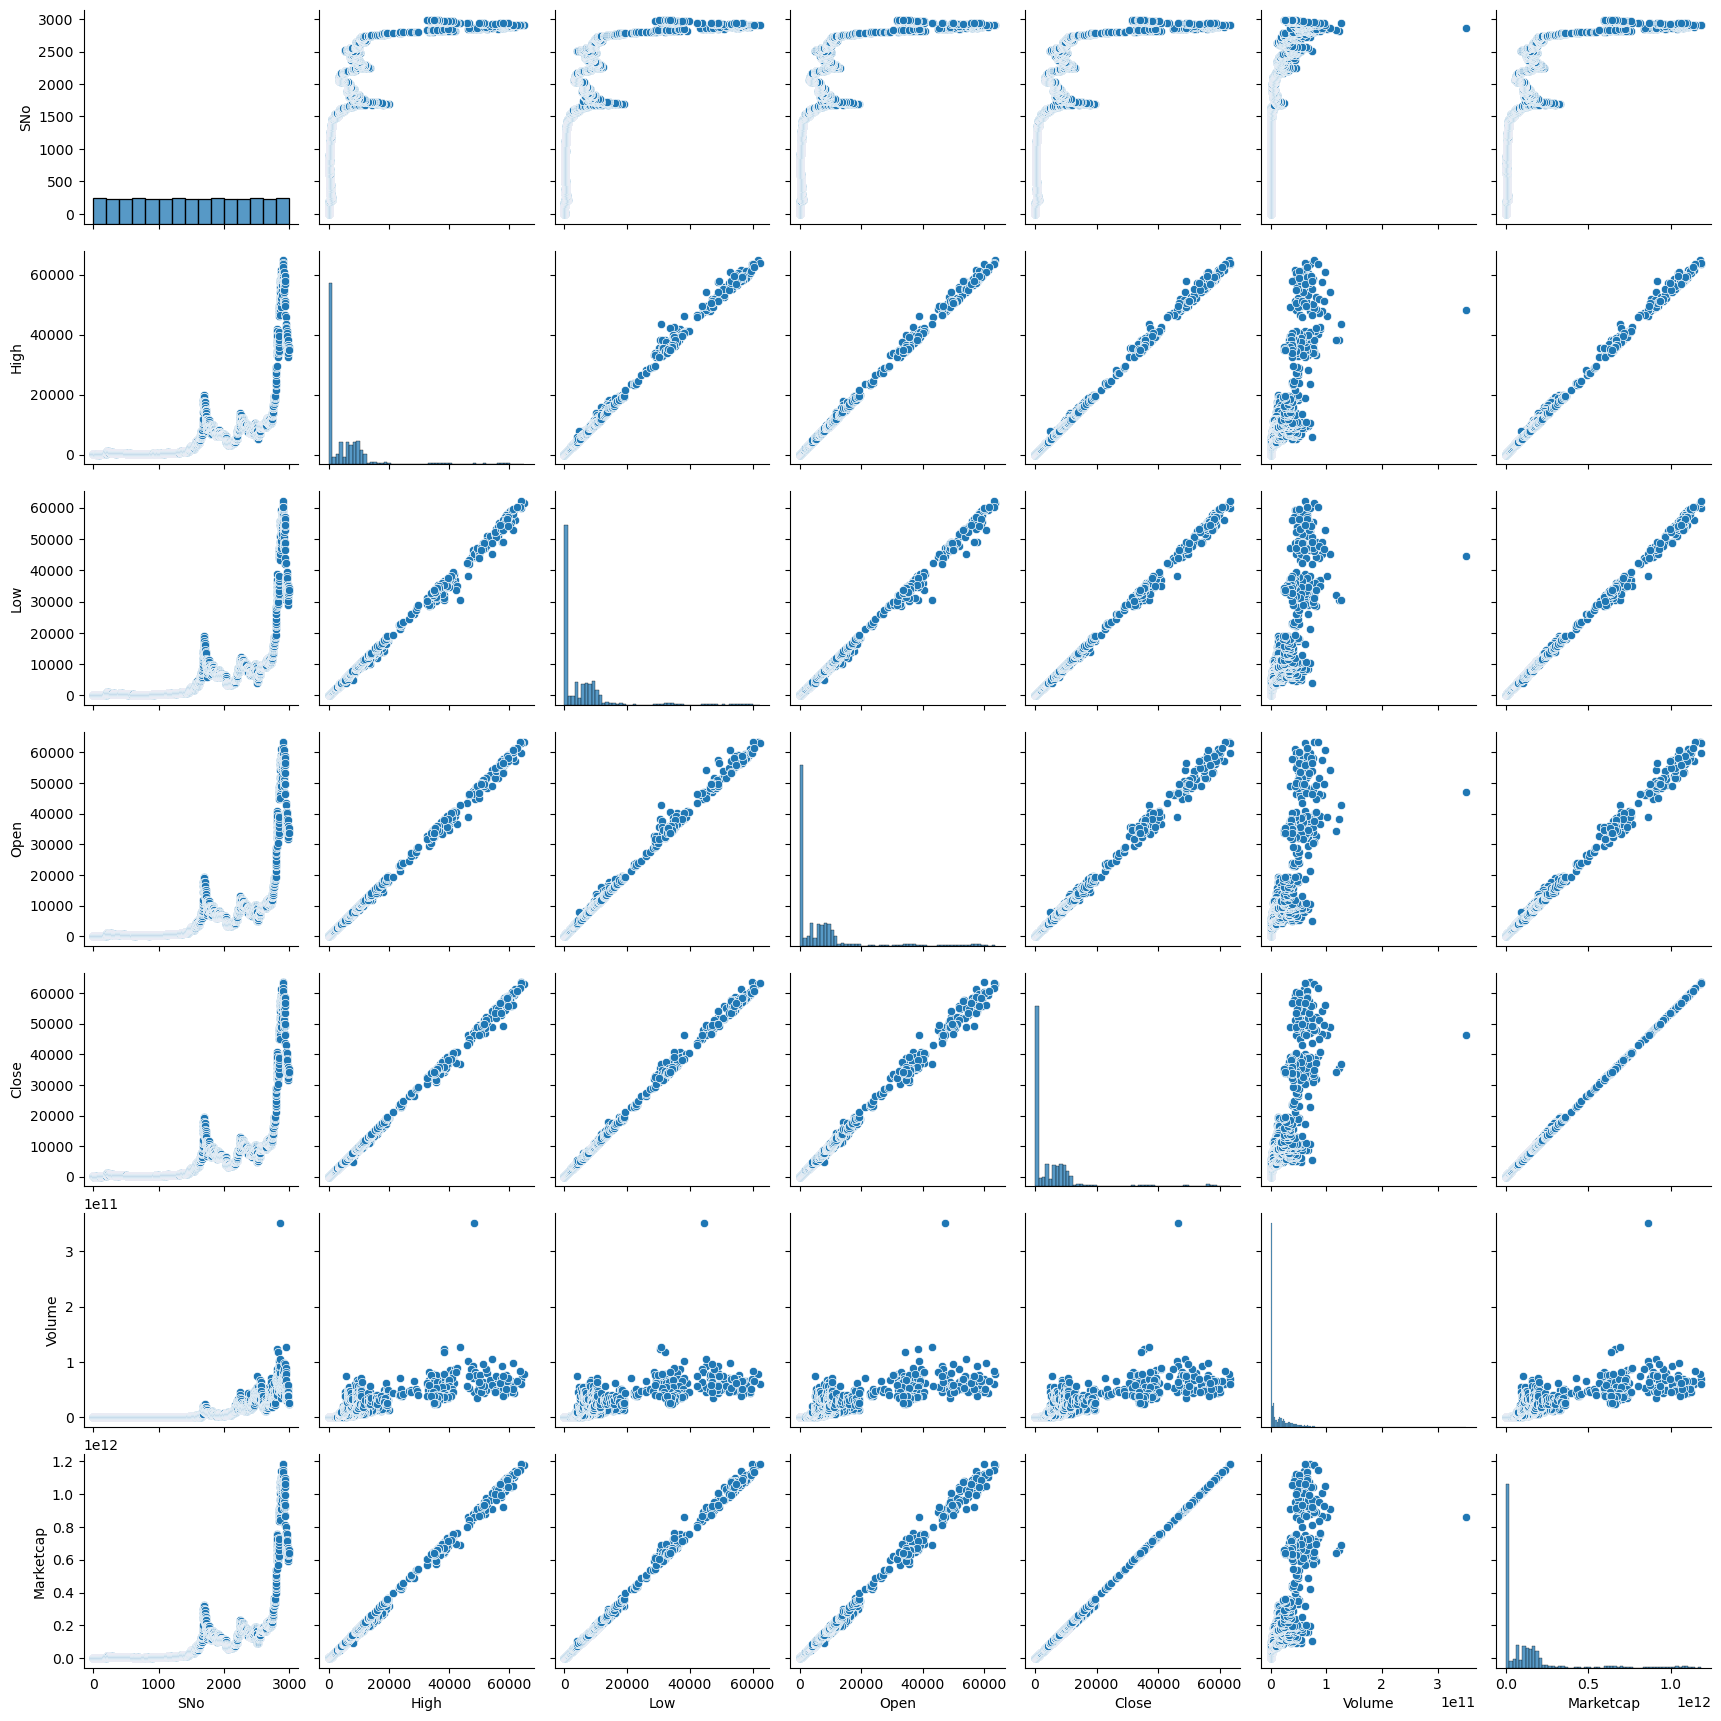

In [14]:
# Comparasion between the values within the dataset
sns.pairplot(Bitcoin_df)

In [15]:
X

,Date,High,Low,Open
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000
...,...,...,...,...
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430


In [16]:
#Convert date values to Unix timestamp format to fit MinMaxScaler function
import time
X['Date'] = X['Date'].apply(lambda x: int(time.mktime(time.strptime(x, '%Y-%m-%d %H:%M:%S'))))

In [17]:
X

,Date,High,Low,Open
0,1367276399,147.488007,134.000000,134.444000
1,1367362799,146.929993,134.050003,144.000000
2,1367449199,139.889999,107.720001,139.000000
3,1367535599,125.599998,92.281898,116.379997
4,1367621999,108.127998,79.099998,106.250000
...,...,...,...,...
2986,1625266799,33939.588699,32770.680780,33549.600177
2987,1625353199,34909.259899,33402.696536,33854.421362
2988,1625439599,35937.567147,34396.477458,34665.564866
2989,1625525999,35284.344430,33213.661034,35284.344430


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
scaler.data_max_

array([1.62561240e+09, 6.48630989e+04, 6.22089644e+04, 6.35237549e+04])

In [20]:
scaler.data_min_

array([1.36727640e+09, 7.45610962e+01, 6.55260010e+01, 6.85049973e+01])

In [21]:
print(X_scaled[:,0])

[0.00000000e+00 3.34448161e-04 6.68896321e-04 ... 9.99331104e-01
 9.99665552e-01 1.00000000e+00]


In [22]:
y = Bitcoin_df['Close']
y.shape

(2991,)

In [23]:
y

0         144.539993
1         139.000000
2         116.989998
3         105.209999
4          97.750000
            ...     
2986    33897.048590
2987    34668.548402
2988    35287.779766
2989    33746.002456
2990    34235.193451
Name: Close, Length: 2991, dtype: float64

In [24]:
y.shape

(2991,)

In [25]:
y = y.values.reshape(-1,1)

In [26]:
y_scaled = scaler.fit_transform(y)

In [27]:
y_scaled

array([[0.00119979],
       [0.00111246],
       [0.00076549],
       ...,
       [0.5552035 ],
       [0.53089867],
       [0.53861036]])

#  TRAINING THE MODEL

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [55]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(40, input_dim=4, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                200       
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,881
Trainable params: 1,881
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/100
72/72 [==============================] - 1s 8ms/step - loss: 0.0051 - val_loss: 1.2761e-04
Epoch 2/100
72/72 [==============================] - 0s 3ms/step - loss: 8.1100e-05 - val_loss: 7.0121e-05
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 5.4323e-05 - val_loss: 5.7292e-05
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 4.7874e-05 - val_loss: 5.8781e-05
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 4.7355e-05 - val_loss: 7.5234e-05
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 5.2950e-05 - val_loss: 4.7711e-05
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: 4.9179e-05 - val_loss: 5.9551e-05
Epoch 8/100
72/72 [==============================] - 0s 3ms/step - loss: 5.0475e-05 - val_loss: 5.7499e-05
Epoch 9/100
72/72 [==============================] - 0s 3ms/step - loss: 4.7579e-05 - val_loss: 6.8724e-05
Epoch 10/100
72/72 [=====================

Epoch 77/100
72/72 [==============================] - 0s 6ms/step - loss: 3.9303e-05 - val_loss: 4.7261e-05
Epoch 78/100
72/72 [==============================] - 0s 3ms/step - loss: 3.0124e-05 - val_loss: 3.2171e-05
Epoch 79/100
72/72 [==============================] - 0s 3ms/step - loss: 2.9047e-05 - val_loss: 3.3405e-05
Epoch 80/100
72/72 [==============================] - 0s 5ms/step - loss: 2.7886e-05 - val_loss: 4.1212e-05
Epoch 81/100
72/72 [==============================] - 0s 5ms/step - loss: 3.1983e-05 - val_loss: 1.9646e-05
Epoch 82/100
72/72 [==============================] - 0s 4ms/step - loss: 3.1058e-05 - val_loss: 2.7570e-05
Epoch 83/100
72/72 [==============================] - 0s 4ms/step - loss: 3.0092e-05 - val_loss: 3.1409e-05
Epoch 84/100
72/72 [==============================] - 0s 4ms/step - loss: 2.3637e-05 - val_loss: 2.1214e-05
Epoch 85/100
72/72 [==============================] - 0s 3ms/step - loss: 2.6602e-05 - val_loss: 5.0475e-05
Epoch 86/100
72/72 [========

#  EVALUATING THE MODEL 

In [58]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


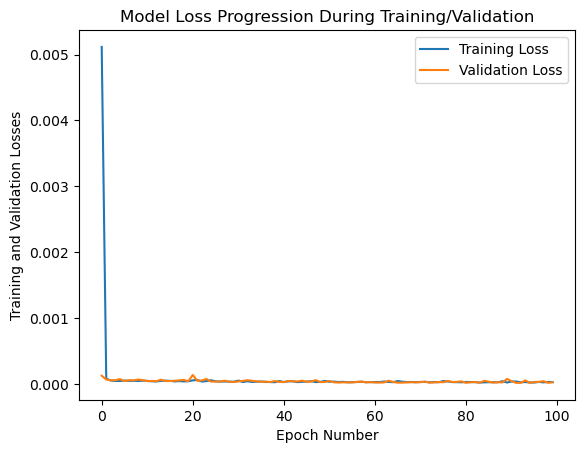

In [59]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [60]:

import datetime
# Create a datetime object for the specific date and time you want
specific_date = datetime.datetime(2022, 9, 10, 12, 0, 0)

# Convert the datetime object to a Unix timestamp
timestamp = int(specific_date.timestamp())

# Add the x values to the X_Testing array
X_Testing = np.array([[timestamp, 21138.536363, 21038.536363, 21250.536363]])

In [61]:
y_predict = model.predict(X_Testing)
y_predict.shape

1/1 [==============================] - 0s 95ms/step


(1, 1)

In [62]:
print('Expected Close Value=', y_predict[:,0])

Expected Close Value= [95535616.]
